<a href="https://colab.research.google.com/github/lalit1511/SQL_Projects/blob/main/SQL_Moviesprojects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sqlite3

# Load both files
movies = pd.read_csv('/content/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/tmdb_5000_credits.csv')

# Preview
movies.head()
credits.head()


<ipython-input-1-28b607c89f7c>:6: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264

,movie_id,title,cast,crew,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Create SQLite in-memory database
conn = sqlite3.connect(":memory:")

# Store tables
movies.to_sql("movies", conn, index=False, if_exists="replace")
credits.to_sql("credits", conn, index=False, if_exists="replace")

# Check structure
pd.read_sql_query("PRAGMA table_info(movies)", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,budget,INTEGER,0,None,0
1,1,genres,TEXT,0,None,0
2,2,homepage,TEXT,0,None,0
3,3,id,INTEGER,0,None,0
4,4,keywords,TEXT,0,None,0
5,5,original_language,TEXT,0,None,0
6,6,original_title,TEXT,0,None,0
7,7,overview,TEXT,0,None,0
8,8,popularity,REAL,0,None,0
9,9,production_companies,TEXT,0,None,0


In [3]:
# Top 10 Highest-Rated Movies (with strong box office & enough votes)
pd.read_sql_query("""
SELECT
    title,
    vote_average,
    vote_count,
    revenue
FROM movies
WHERE revenue > 100000000
  AND vote_count >= 1000
ORDER BY vote_average DESC
LIMIT 10
""", conn)


,title,vote_average,vote_count,revenue
0,The Godfather,8.4,5893,245066411
1,Fight Club,8.3,9413,100853753
2,Schindler's List,8.3,4329,321365567
3,Spirited Away,8.3,3840,274925095
4,Pulp Fiction,8.3,8428,213928762
5,The Dark Knight,8.2,12002,1004558444
6,The Green Mile,8.2,4048,284600000
7,Forrest Gump,8.2,7927,677945399
8,Howl's Moving Castle,8.2,1991,234710455
9,The Empire Strikes Back,8.2,5879,538400000


In [4]:
import ast

# Step 1: Convert JSON-like strings to list of dicts
def extract_genres(row):
    try:
        genres = ast.literal_eval(row)
        return [g['name'] for g in genres]
    except:
        return []

# Step 2: Explode into a flat DataFrame
movie_genre_pairs = []

for i, row in movies.iterrows():
    genres = extract_genres(row['genres'])
    for genre in genres:
        movie_genre_pairs.append({'movie_id': row['id'], 'title': row['title'], 'genre': genre, 'vote_average': row['vote_average']})

# Step 3: Create DataFrame and push to SQL
genre_df = pd.DataFrame(movie_genre_pairs)
genre_df.to_sql("movie_genres", conn, index=False, if_exists='replace')


12160

In [5]:
#SQL – Average rating per genre
pd.read_sql_query("""
SELECT
    genre,
    ROUND(AVG(vote_average), 2) AS avg_rating,
    COUNT(*) AS num_movies
FROM movie_genres
GROUP BY genre
ORDER BY avg_rating DESC
""", conn)


,genre,avg_rating,num_movies
0,History,6.72,197
1,War,6.71,144
2,Drama,6.39,2297
3,Music,6.36,185
4,Foreign,6.35,34
5,Animation,6.34,234
6,Crime,6.27,696
7,Documentary,6.24,110
8,Romance,6.21,894
9,Western,6.18,82


In [6]:
import ast

# Extract directors from credits
director_data = []

for i, row in credits.iterrows():
    try:
        crew_list = ast.literal_eval(row['crew'])
        directors = [person['name'] for person in crew_list if person['job'] == 'Director']
        for director in directors:
            director_data.append({
                'movie_id': row['movie_id'],
                'director': director
            })
    except:
        continue

# Create DataFrame
director_df = pd.DataFrame(director_data)

# Merge with movie ratings
director_df = director_df.merge(movies[['id', 'vote_average']], left_on='movie_id', right_on='id', how='inner')

# Save to SQL
director_df.to_sql('director_ratings', conn, index=False, if_exists='replace')


3506

In [7]:
pd.read_sql_query("""
SELECT
    director,
    ROUND(AVG(vote_average), 2) AS avg_rating,
    COUNT(*) AS movie_count
FROM director_ratings
GROUP BY director
HAVING movie_count >= 3
ORDER BY avg_rating DESC
LIMIT 10
""", conn)


,director,avg_rating,movie_count
0,Hayao Miyazaki,8.05,4
1,Sergio Leone,7.97,3
2,Stanley Kubrick,7.90,3
3,Frank Capra,7.67,3
4,Denis Villeneuve,7.67,3
5,Billy Wilder,7.67,3
6,Christopher Nolan,7.63,3
7,Spike Jonze,7.50,3
8,Wes Anderson,7.47,6
9,David Lean,7.45,4


In [8]:
actor_director_pairs = []

for i, row in credits.iterrows():
    try:
        cast_list = ast.literal_eval(row['cast'])
        crew_list = ast.literal_eval(row['crew'])

        # Get all actors (just top 5 for manageability)
        actors = [person['name'] for person in cast_list[:5]]

        # Get director(s)
        directors = [person['name'] for person in crew_list if person['job'] == 'Director']

        for director in directors:
            for actor in actors:
                actor_director_pairs.append({
                    'movie_id': row['movie_id'],
                    'actor': actor,
                    'director': director
                })
    except:
        continue

# Create DataFrame
ad_df = pd.DataFrame(actor_director_pairs)

# Save to SQL
ad_df.to_sql('actor_director', conn, index=False, if_exists='replace')


25407

In [9]:
#
pd.read_sql_query("""
SELECT
    actor,
    director,
    COUNT(*) AS collaboration_count
FROM actor_director
GROUP BY actor, director
HAVING collaboration_count >= 3
ORDER BY collaboration_count DESC
LIMIT 10
""", conn)


,actor,director,collaboration_count
0,Woody Allen,Woody Allen,14
1,Clint Eastwood,Clint Eastwood,10
2,Tyler Perry,Tyler Perry,8
3,Adam Sandler,Dennis Dugan,7
4,Robert De Niro,Martin Scorsese,7
5,Antonio Banderas,Robert Rodriguez,6
6,Ian McKellen,Peter Jackson,6
7,Jason Mewes,Kevin Smith,6
8,Johnny Depp,Tim Burton,6
9,Michael Moore,Michael Moore,6


In [10]:
#Convert release_date to Year
# Convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Extract year
movies['release_year'] = movies['release_date'].dt.year

# Save updated table
movies.to_sql("movies", conn, index=False, if_exists="replace")


4803

In [11]:
# SQL – Movie Count by Year
pd.read_sql_query("""
SELECT
    release_year,
    COUNT(*) AS num_movies
FROM movies
WHERE release_year IS NOT NULL
GROUP BY release_year
ORDER BY release_year
""", conn)


,release_year,num_movies
0,1916.0,1
1,1925.0,1
2,1927.0,1
3,1929.0,1
4,1932.0,1
...,...,...
70,2013.0,91
71,2014.0,98
72,2015.0,89
73,2016.0,46


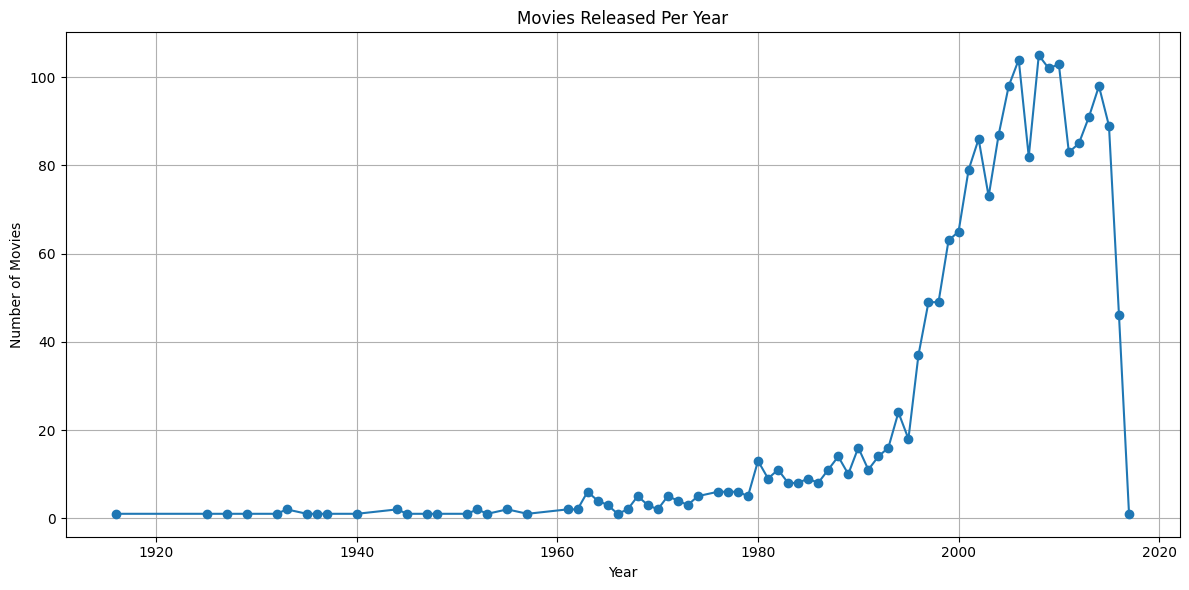

In [13]:
import matplotlib.pyplot as plt

yearly=pd.read_sql_query("""SELECT
release_year,COUNT(*) AS  num_movies
FROM movies
WHERE release_year is NOT NULL
GROUP BY release_year
ORDER BY release_year""",conn)

plt.figure(figsize=(12,6))
plt.plot(yearly['release_year'], yearly['num_movies'], marker='o')
plt.title("Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.tight_layout()
plt.show()